In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
AgeGroupDetails = pd.read_csv('AgeGroupDetails.csv')
Covid_19_india = pd.read_csv('covid_19_india.csv', parse_dates=['Date'], dayfirst=True)
HospitalBedsIndia = pd.read_csv('HospitalBedsIndia.csv')
ICMRTestingDetails = pd.read_csv('ICMRTestingDetails.csv',sep=r'\t', engine='python')
IndividualDetails = pd.read_csv('IndividualDetails.csv',parse_dates=['diagnosed_date'],dayfirst=True)
lab_data=pd.read_csv('ICMRTestingLabs.csv')
Population_india_census2011 = pd.read_csv('population_india_census2011.csv')

<h1>Question 1</h1>

In [2]:
AgeGroupDetails

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


Age group <b>20-29</b> is most infected

<h1>Question 2</h1>

In [3]:
Covid_19_india.head()
#  The entries are sorted by date

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [0]:
df = Covid_19_india.copy()
rows, cols = df.shape

In [5]:
df.isnull().any()

Sno                         False
Date                        False
Time                        False
State/UnionTerritory        False
ConfirmedIndianNational     False
ConfirmedForeignNational    False
Cured                       False
Deaths                      False
Confirmed                   False
dtype: bool

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


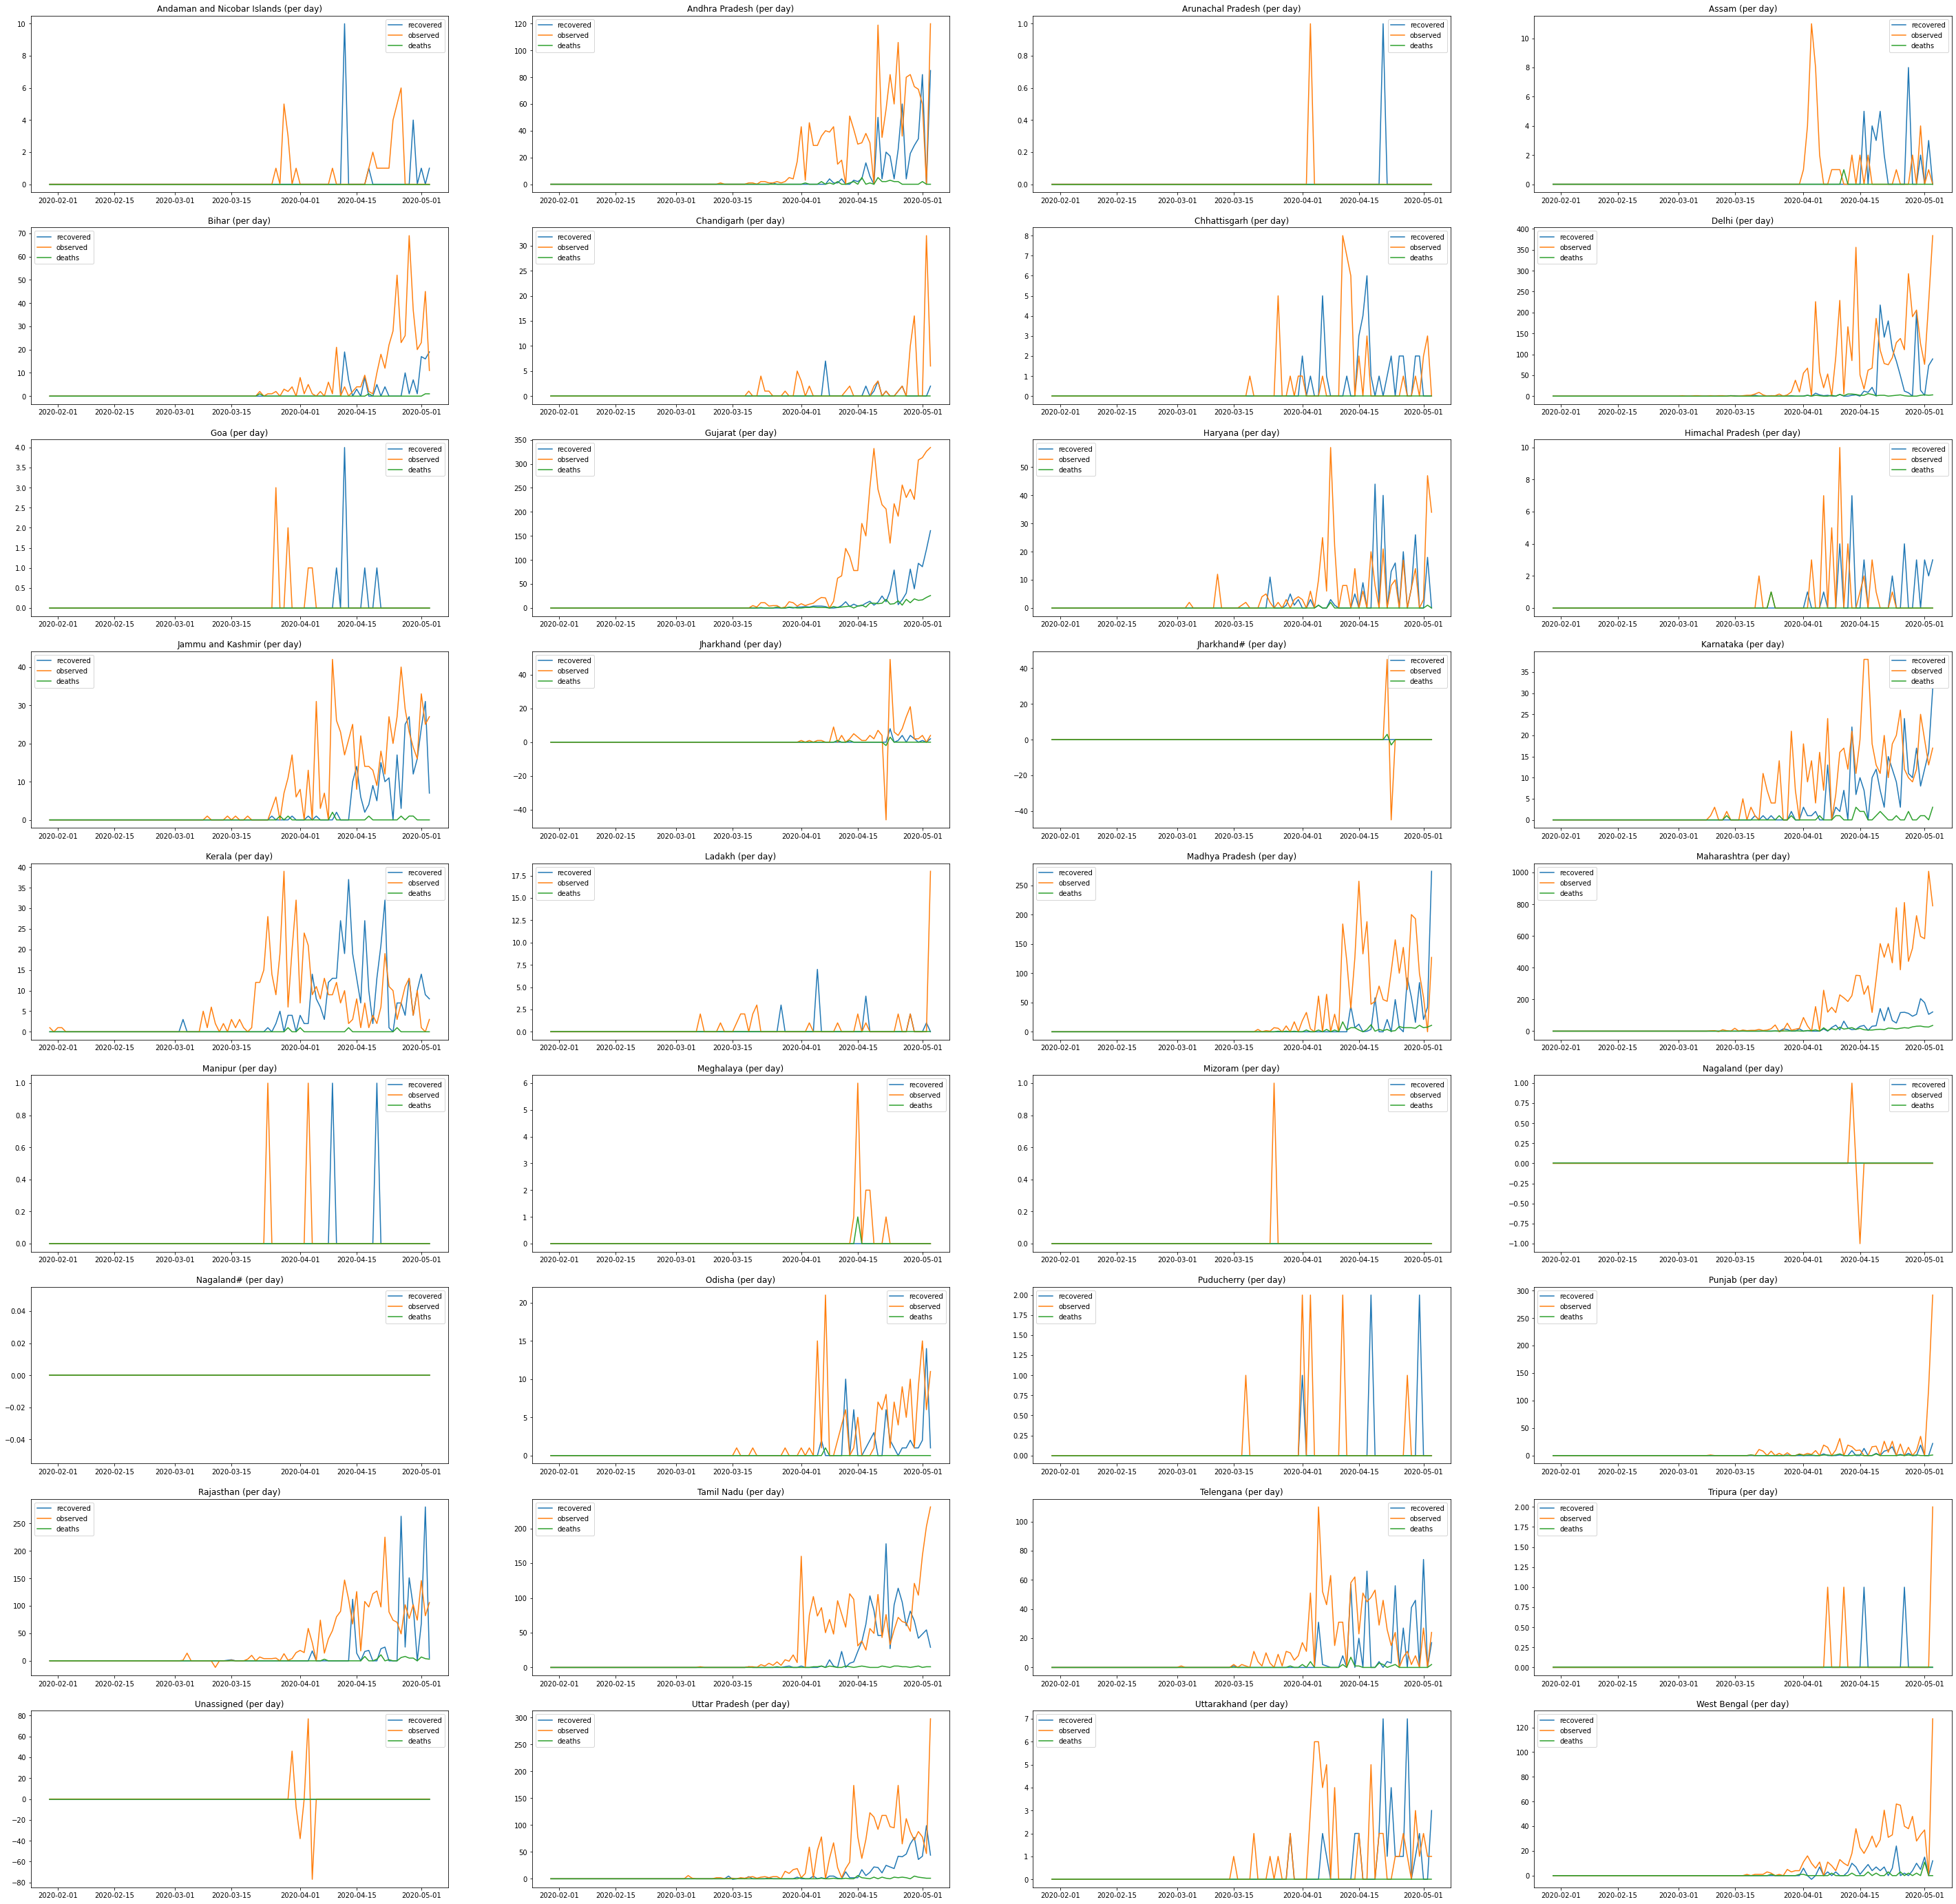

In [6]:
unique_states=df['State/UnionTerritory'].unique()


df_obs=df.groupby(['Date','State/UnionTerritory']).Confirmed.max()
df_obs=df_obs.unstack()
df_obs.fillna(0,inplace=True)
df_obs1=df_obs.diff()                        # Converting from cumulative to per day
df_obs1=df_obs1.T                            
df_obs=df_obs.T
df_obs1['2020-01-30']=df_obs['2020-01-30']
df_obs1=df_obs1.T

df_rec=df.groupby(['Date','State/UnionTerritory']).Cured.max()
df_rec=df_rec.unstack()
df_rec.fillna(0,inplace=True)
df_rec1=df_rec.diff()
df_rec1=df_rec1.T
df_rec=df_rec.T
df_rec1['2020-01-30']=df_rec['2020-01-30']
df_rec1=df_rec1.T

df_d=df.groupby(['Date','State/UnionTerritory']).Deaths.max()
df_d=df_d.unstack()
df_d.fillna(0,inplace=True)
df_d1=df_d.diff()
df_d1=df_d1.T
df_d=df_d.T
df_d1['2020-01-30']=df_d['2020-01-30']
df_d1=df_d1.T

date_list=df_obs1.index

plt.figure(figsize=(50,50))
i=1
plt.subplot(9,4,1)
for state in df_obs1.columns:
    obs=list(df_obs1[state])
    rec=list(df_rec1[state])
    deaths=list(df_d1[state])
    plt.subplot(9,4,i)
    plt.title(state+' (per day)')
    plt.plot(date_list,rec,label='recovered')
    plt.plot(date_list,obs,label='observed')
    plt.plot(date_list,deaths,label='deaths')
    plt.legend()
    i+=1
     
# Note: The range of values in the y-axis varies from plot to plot.
# For example, Andhra Pradesh has y-axis ranging  0-120 while Assam has y-axis ranging 0-10

Negative values in confirmed cases is due to the infecting people moving from one state to another.

For example, an infected bengali person in andaman is immediately sent back to west bengal.

Text(0.5, 1.0, 'Confirmed cases (Foreign vs Indian)')

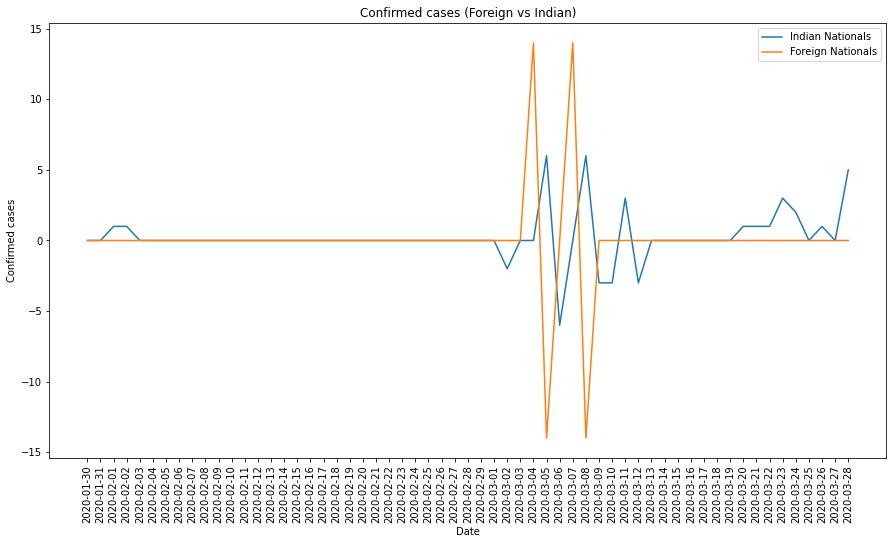

In [7]:
df_cin=df.copy()
df_cin=df_cin[df_cin['ConfirmedIndianNational']!='-']
df_cin['ConfirmedIndianNational']=df_cin['ConfirmedIndianNational'].astype('float')
df_cin['ConfirmedIndianNational']=df_cin['ConfirmedIndianNational'].diff()
df_cin=df_cin.groupby('Date')['ConfirmedIndianNational'].sum()
df_cfn=df.copy()
df_cfn=df_cfn[df_cfn['ConfirmedForeignNational']!='-']
df_cfn['ConfirmedForeignNational']=df_cfn['ConfirmedForeignNational'].astype('float')
df_cfn['ConfirmedForeignNational']=df_cfn['ConfirmedForeignNational'].diff()
df_cfn=df_cfn.groupby('Date')['ConfirmedForeignNational'].sum()
cin=df_cin.values
cfn=df_cfn.values
dates=df_cin.index
plt.figure(figsize=(15,8))
plt.xlabel('Date')
plt.ylabel('Confirmed cases')
plt.plot(dates,cin,label='Indian Nationals')
plt.plot(dates,cfn,label='Foreign Nationals')
plt.xticks(dates,rotation=90)
plt.legend()
plt.title('Confirmed cases (Foreign vs Indian)')

Ideally we should not have negative confirmed indian and foreign cases per day . But we see negative values. This is possibly due to the indian and foreign nationals moving in and out of the country

Let's now plot the confirmed, deaths, cured cases per day for the entire nation(non-cumulative).

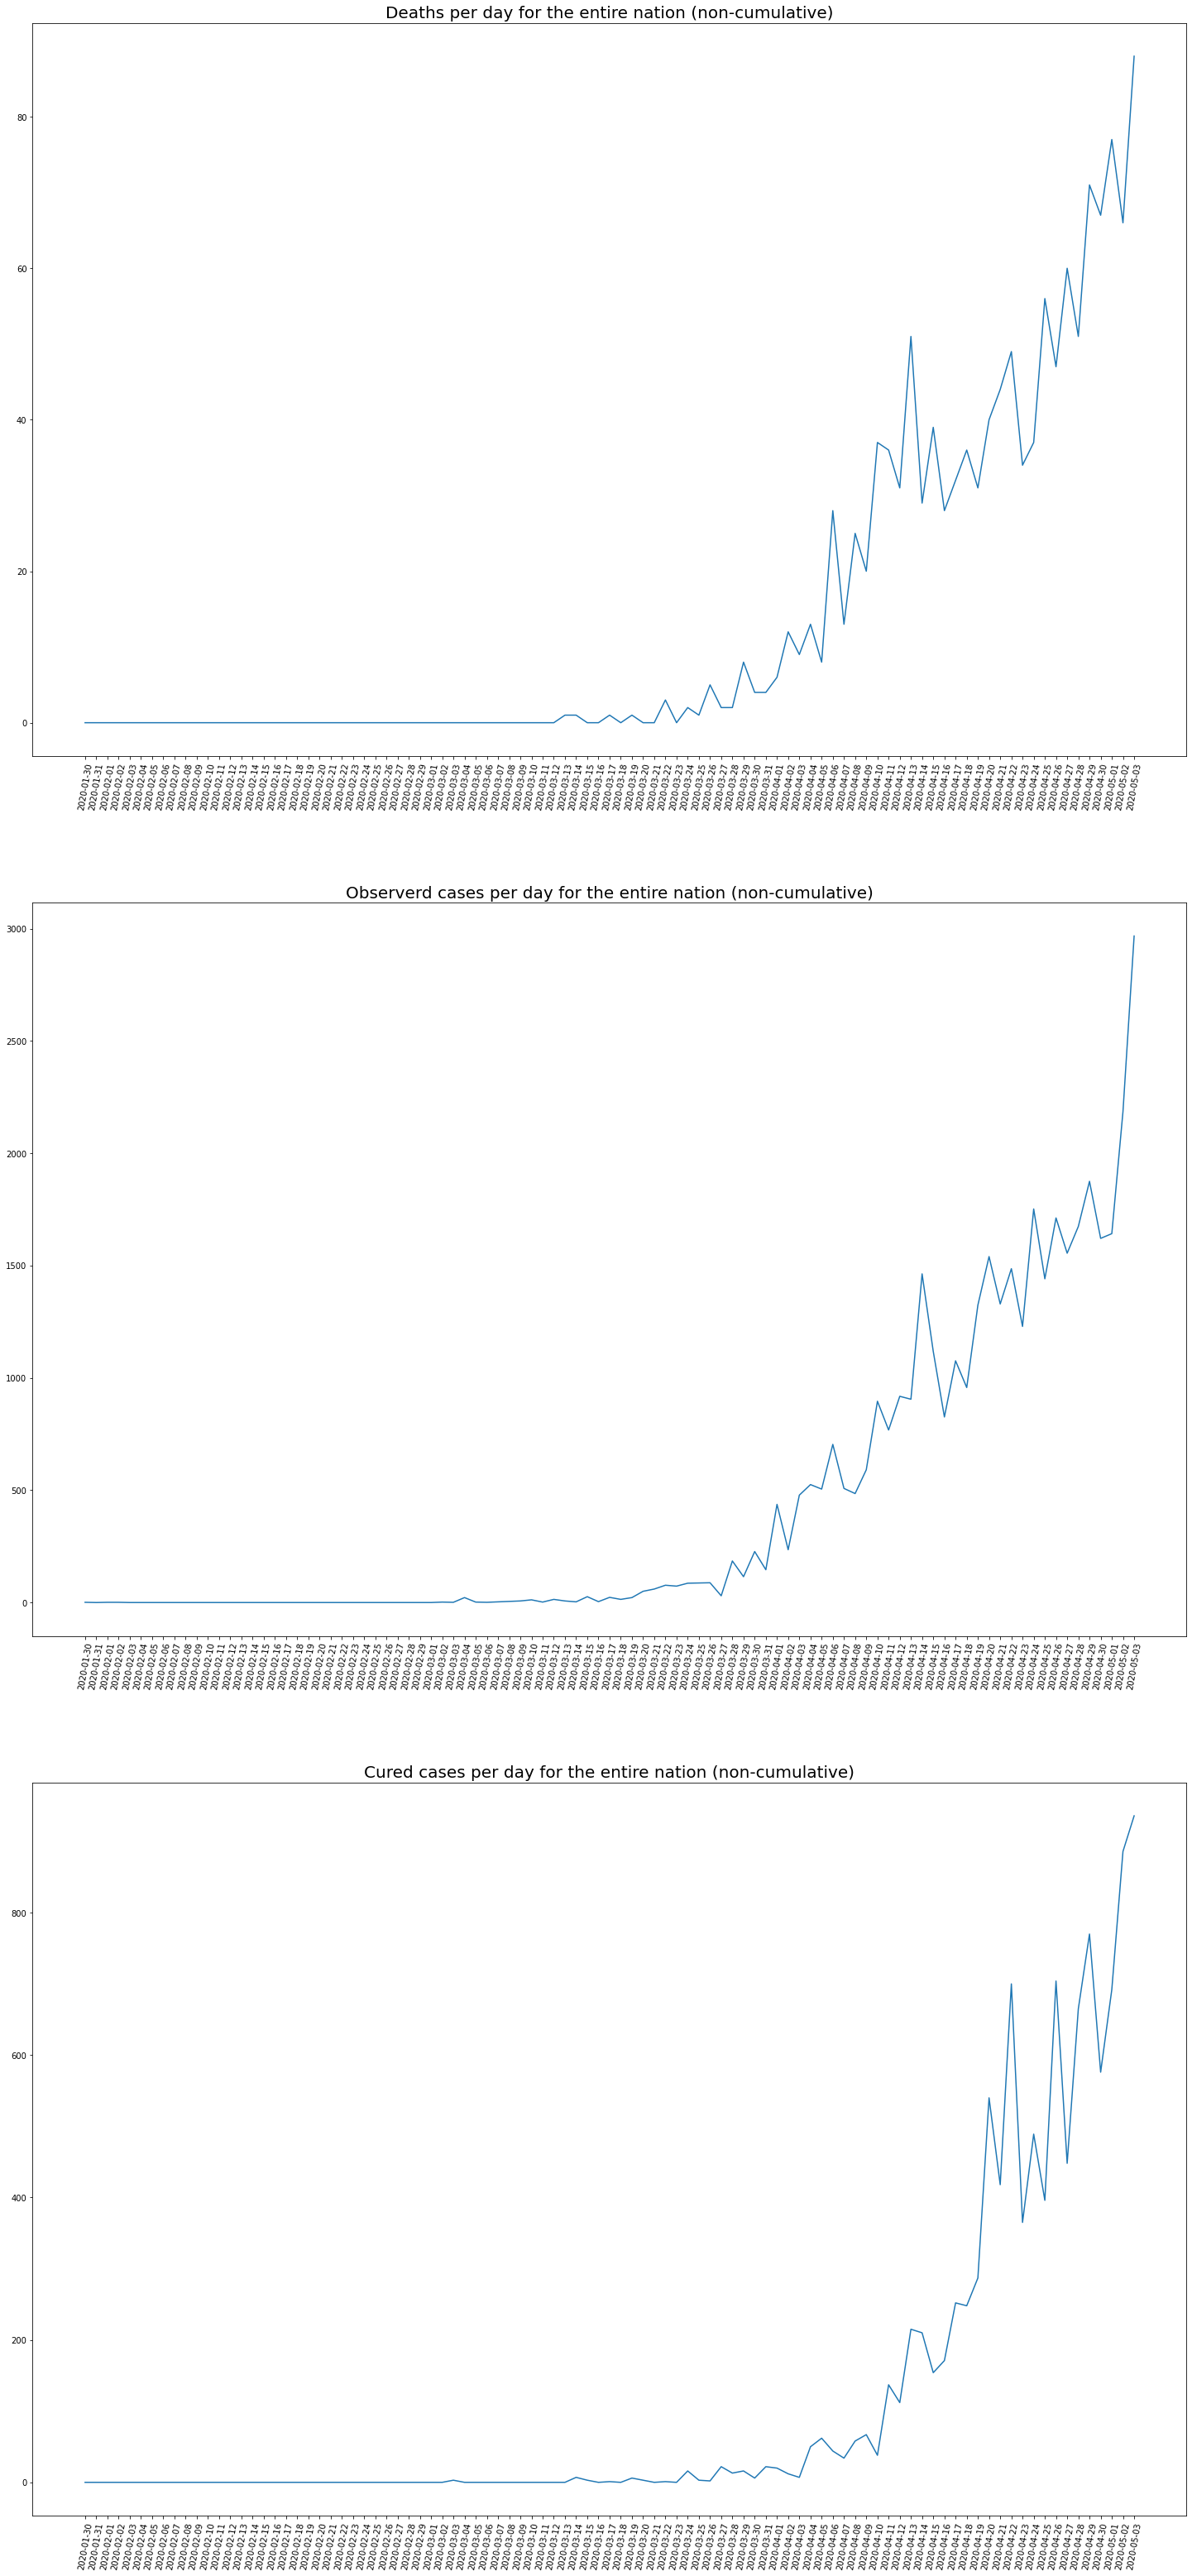

In [92]:
df_india_deaths=df.groupby(['Date','State/UnionTerritory'])['Deaths'].sum()
df_india_deaths=df_india_deaths.unstack()
df_india_deaths.fillna(0,inplace=True)
df_india_deaths1=df_india_deaths.diff()
df_india_deaths1=df_india_deaths1.T
df_india_deaths=df_india_deaths.T
df_india_deaths1['2020-01-30']=df_india_deaths['2020-01-30']

df_india_Confirmed=df.groupby(['Date','State/UnionTerritory'])['Confirmed'].sum()
df_india_Confirmed=df_india_Confirmed.unstack()
df_india_Confirmed.fillna(0,inplace=True)
df_india_Confirmed1=df_india_Confirmed.diff()
df_india_Confirmed1=df_india_Confirmed1.T
df_india_Confirmed=df_india_Confirmed.T
df_india_Confirmed1['2020-01-30']=df_india_Confirmed['2020-01-30']

df_india_Cured=df.groupby(['Date','State/UnionTerritory'])['Cured'].sum()
df_india_Cured=df_india_Cured.unstack()
df_india_Cured.fillna(0,inplace=True)
df_india_Cured1=df_india_Cured.diff()
df_india_Cured1=df_india_Cured1.T
df_india_Cured=df_india_Cured.T
df_india_Cured1['2020-01-30']=df_india_Cured['2020-01-30']



plt.figure(figsize=(25,75))
plt.subplot(4,1,1)
plt.plot(df_india_deaths1.sum().index,df_india_deaths1.sum().values)
plt.xticks(df_india_Confirmed1.sum().index,rotation=80)
plt.title('Deaths per day for the entire nation (non-cumulative)',Fontsize=20)
plt.subplot(4,1,2)
plt.plot(df_india_Confirmed1.sum().index,df_india_Confirmed1.sum().values)
plt.xticks(df_india_deaths1.sum().index,rotation=80)
plt.title('Observerd cases per day for the entire nation (non-cumulative)',Fontsize=20)
plt.subplot(4,1,3)
plt.plot(df_india_Cured1.sum().index,df_india_Cured1.sum().values)
plt.xticks(df_india_Cured1.sum().index,rotation=80)
plt.title('Cured cases per day for the entire nation (non-cumulative)',Fontsize=20)
plt.show()

<h1> Question 3 <h1>

In [0]:
dfpop=Population_india_census2011.copy()

<h1> Question 4 <h1>

In [9]:
df4=IndividualDetails.copy()
df4=df4[df4.current_status=='Hospitalized']


# District=city list
district_equal_city=list(df4['detected_city'].loc[df4.detected_city==df4.detected_district].unique())

# dataframe where detected_city notnull
df41=df4[df4.detected_city.notnull()]

# dataframe where detected_city null and district is in the (district=city) list
df42=df4[(df4.detected_city.isnull()) & (df4.detected_district.isin(district_equal_city))]
# city Null value filled with district name 
df42.detected_city=df42.detected_district

#concatenate two dataframes
df4=pd.concat([df41.copy(),df42.copy()])

# Finding hotspots
df43=df4[df4.diagnosed_date<='2020-04-10']
count_per_city=df43.groupby(['detected_city'])['id'].count()
hotspot_series=count_per_city[count_per_city>=10]
hotspot_series



/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


detected_city
Agra                 83
Ahmedabad           188
Ahmednagar           18
Amritsar             11
Aurangabad           16
Bengaluru            21
Bhavnagar            21
Bhilwara             26
Bhopal              116
Bhubaneswar          19
Bodi                 13
Chandigarh           18
Chennai             164
Coimbatore           58
Dehradun             17
Faridabad            28
Gandhinagar          14
Ghaziabad            23
Guntur               30
Gurugram             34
Hyderabad           212
Indore              234
Jaipur              202
Jammu                18
Jhunjhunu            31
Jodhpur              42
Kalyan-Dombivali     34
Karimnagar           18
Kasaragod           157
Kurnool              18
Lucknow              29
Ludhiana             10
Malappuram           16
Mettupalayam         20
Mira-Bhayandar       21
Mohali               11
Mumbai              999
Nagpur               25
Navi Mumbai          32
Nizamuddin area      24
Noida                12
On

<h1>Question 5<h1>

In [0]:
df4=IndividualDetails.copy()



df4['detected_city']=df4['detected_city']+'+'+df4['detected_state']
c1=df4.loc[(df4.diagnosed_date<='2020-03-20') & ((df4.current_status=='Hospitalized') | (df4.status_change_date>='2020-03-20'))]             # I am taking into account those who are (diagnosed on or before 20th march and hospitalized) and also those who are (diagnosed on or before 20th march, but recovered/died on any date AFTER 20th march) which means these recovered/deceased people used to be hospitalized on or before 20th march                                                
count_per_city=c1.groupby(['detected_city'])['id'].count()
hs1=count_per_city[count_per_city>=10]
c2=df4.loc[(df4.diagnosed_date<='2020-03-27') & ((df4.current_status=='Hospitalized') | (df4.status_change_date>='2020-03-27'))]
count_per_city=c2.groupby(['detected_city'])['id'].count()
hs2=count_per_city[count_per_city>=10]
c3=df4.loc[(df4.diagnosed_date<='2020-04-03') & ((df4.current_status=='Hospitalized') | (df4.status_change_date>='2020-04-03'))]
count_per_city=c3.groupby(['detected_city'])['id'].count()
hs3=count_per_city[count_per_city>=10]
c4=df4.loc[(df4.diagnosed_date<='2020-04-10') & ((df4.current_status=='Hospitalized') | (df4.status_change_date>='2020-04-10'))]
count_per_city=c4.groupby(['detected_city'])['id'].count()
hs4=count_per_city[count_per_city>=10]

hs1=pd.DataFrame(hs1).reset_index()
hs1=hs1['detected_city'].str.split('+',expand=True)[1].value_counts()
hs2=pd.DataFrame(hs2).reset_index()
hs2=hs2['detected_city'].str.split('+',expand=True)[1].value_counts()
hs3=pd.DataFrame(hs3).reset_index()
hs3=hs3['detected_city'].str.split('+',expand=True)[1].value_counts()
hs4=pd.DataFrame(hs4).reset_index()
hs4=hs4['detected_city'].str.split('+',expand=True)[1].value_counts()

States and their corresponding number of hotspots as on 20th march, 27th march, 3rd april and 10th april are as follows

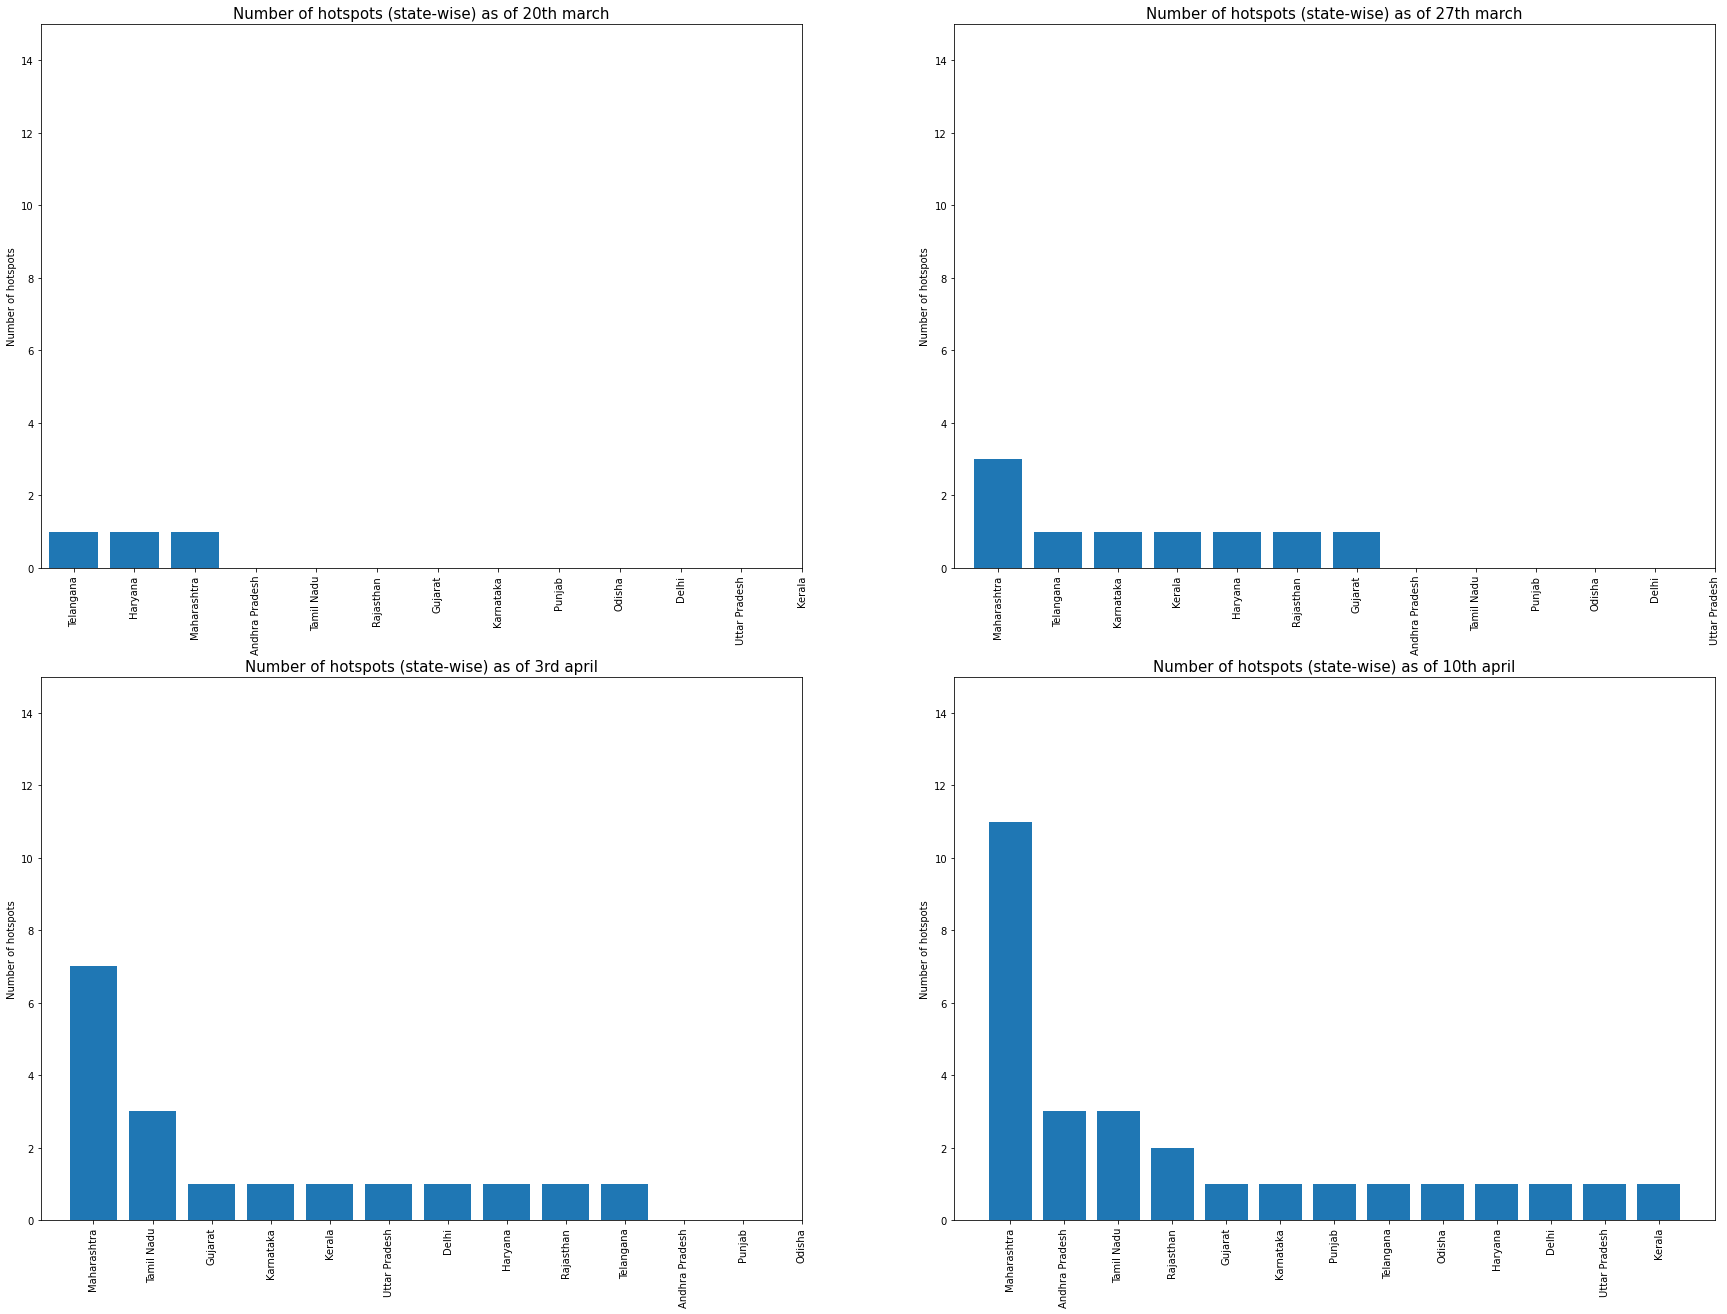

In [11]:
plt.figure(figsize=(30,22))
j=1
dlist=['20th march','27th march','3rd april','10th april']
for i in (hs1,hs2,hs3,hs4):
  plt.subplot(2,2,j)
  plt.bar(i.index,i.values)
  plt.xticks(hs4.index,rotation=90)
  plt.ylabel('Number of hotspots')
  plt.ylim(0,15)
  plt.title('Number of hotspots (state-wise) as of {}'.format(dlist[j-1]),fontsize=15)
  j+=1

From 20th march to 27th march Maharashtra has the maximum increase in the number of hotspots. Increase by 2 from 1 to 3. 

From 

# Question 7

Assuming sufficient number of labs were present at 10th of april.

In [52]:
conf_11=df['Confirmed'].loc[df.Date=='2020-04-11'].sum()-df['Confirmed'].loc[df.Date=='2020-04-10'].sum()
conf_20=conf_11*(1.1)**9
additional_labs=conf_20/100
additional_labs


18.109038266880017

<h1> Question 8 <h1>

Text(0.5, 1.0, 'Total confirmed cases in India (cumulative)')

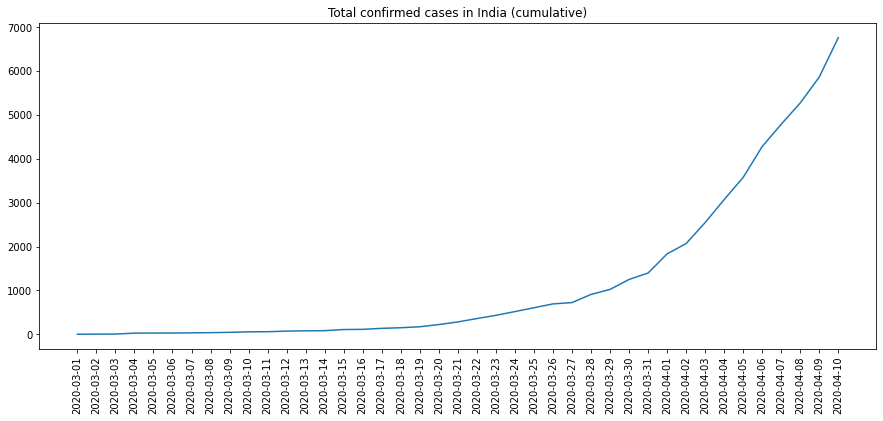

In [53]:
df9=df.loc[(df.Date>='2020-03-01') & (df.Date<='2020-04-10')]
df9=df9.groupby(['Date'])['Confirmed'].sum()

#plotting
plt.figure(figsize=(15,6))
plt.plot(df9.index,df9.values)
plt.xticks(df9.index,rotation=90)
plt.title('Total confirmed cases in India (cumulative)')



We haven't come to the phase of flattening the curve yet. The infected cases are increasing and the rate of increase also seems to be increasing


# Question 10

Let's make a line plot of confirmed cases per day to see how effective the lockdown has been. 

The plot is **not** cumulative as cumulative confirmed cases per day will **not** give an usefull idea on the effectiveness of lockdown.

Text(0.5, 1.0, 'Confirmed cases per day (non-cumulative)')

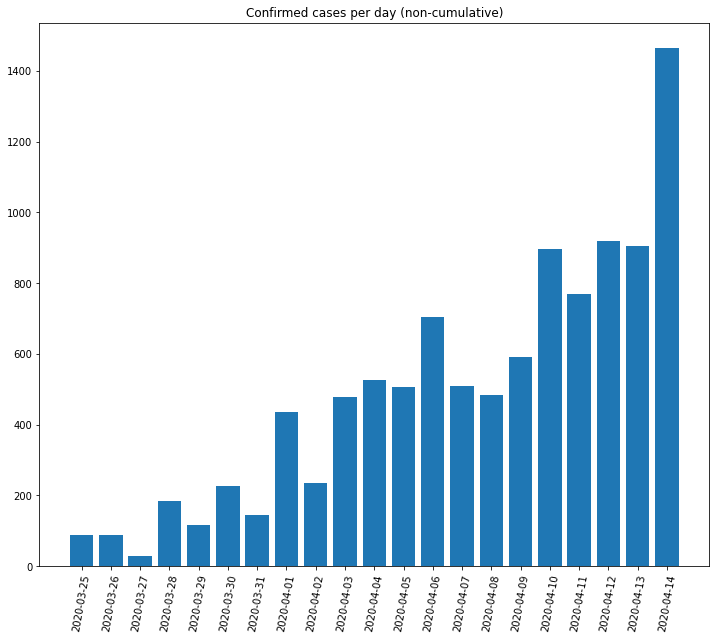

In [56]:
df10=df.loc[(df.Date>='2020-03-24') & (df.Date<='2020-04-14')]   # Lower limit 24th march instead of  25th march for the purpose of subtracting
df10=df10.groupby('Date')['Confirmed'].sum() 
df10=df10.diff()                                                 # Culumulative to per day
df10.dropna(inplace=True)                                        # Removing value of 24th march 
df10
plt.figure(figsize=(12,10))
plt.bar(df10.index,df10.values)
plt.xticks(df10.index,rotation=80)
plt.title('Confirmed cases per day (non-cumulative)')

We have verified the validity of our above graph with the link given below.

 https://www.bloombergquint.com/coronavirus-outbreak/coronavirus-updates-total-cases-in-india-rise-death-toll-cured-lockdwon-extension-health-ministry-states-measures-icmr?share=eyJjYXJkSWQiOiI4Mzk2OWM2OS00ODc3LTQ4ZjItOGMwOS1kMzJhNjM3MmM2N2QiLCJlbGVtZW50Ijp7ImlkIjoiMWNhMzc0MGEtZTY2Zi00NDAxLWE0MTctMmZkZTlmNTYyOWFhIn19

Note: Only the **dataset given** is used. The above link is for the purpose verification alone.

From the graph above we can conclude that the 21 day lockdown from 25th march to 14th april is only **partially successful** as by the end of lockdown i.e.14th april, the new infected cases have soared up (probably because people are not following it strictly).

We do see some relative dips in new infected cases on dates like 8th april and 11th april indicating that lockdown is indeed working.

**Suggestion/Inference:**

The lockdown **needs** to be (infact will be) extended beyond 14th april and more strict measures should be taken during the extended lockdown.  



